# Introduction

This notebook will be examining the "House Prices - Advanced Regression Techniques" data from this Kaggle competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

It has training data describing a lot of house sales, and the amount of money that the house was sold for. There is also some extra test data which is similar but does not have the sale price.

I am going to combine this data, clean and visualize it, then use the training data to build some models to try to predict the sale price as accurately as I can. Then I will submit the test data with mypredictions to Kaggle to see if my results are valid.

The data should be attached in a folder called 'data/' which includes a "data_description.txt" file from Kaggle which explains all of the features.

## Step 1: Pull the data

In [22]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Add a dummy column to test for our target so we can combine the data
test["SalePrice"] = -1
df = pd.concat([train, test], axis=0).reset_index(drop=True)

# Get the shape of the data to see how many rows and columns we have
# Since this is Kaggle competition data, we get an extra test dataset that is missing the target feature
# Even though it's not needed for this project, we will try our best and submit in the competition
# Since kaggle will give us a score and help sanity check our results
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Combined shape:", df.shape)

Train shape: (1460, 81)
Test shape: (1459, 81)
Combined shape: (2919, 81)


# EDA

In [23]:
## Let's get a simple look at our data
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000,842.787,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.138,42.518,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.306,23.345,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114,7886.996,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089,1.410,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.565,1.113,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.313,30.291,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264,20.894,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201,179.334,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423,455.611,0.0,0.0,368.5,733.0,5644.0


## Step 1: Deal with Null Data

In [24]:
# We can see that there are some null values in our data. This will cause issues for some models.
# Let's get a count of what is null
null_counts = df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts > 0]
null_counts

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
BsmtFinSF1         1
GarageCars         1
GarageArea         1
Exterior2nd        1
BsmtUnfSF          1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
BsmtFinSF2         1
KitchenQual        1
Electrical         1
dtype: int64

In [25]:
# I'm going to remove features that have a large percentage null, since they are very unreliable
null_columns_to_drop = null_counts[null_counts > 400].index
df = df.drop(columns=null_columns_to_drop, axis=1)

# Let's get the new list
null_counts = df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts > 0]
null_counts

GarageFinish    159
GarageYrBlt     159
GarageQual      159
GarageCond      159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrArea       23
MSZoning          4
BsmtFullBath      2
BsmtHalfBath      2
Utilities         2
Functional        2
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
Electrical        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
GarageArea        1
SaleType          1
GarageCars        1
dtype: int64

In [26]:
# Now our remaining features have small null counts.
# I'm going to replace them with the average values since I don't have enough
# domain knowledge to try and do better
for column in df.columns:
    # Check if the column type is numeric (integer or float)
    if pd.api.types.is_numeric_dtype(df[column]):
        # Fill missing values with the median of the column
        df[column] = df[column].fillna(value=df[column].median())
    # Check if the column type is an object (string)
    else:
        # Fill missing values with the most common value
        df[column] = df[column].mode()[0]

# Let's make sure we have no nulls now
null_counts = df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts > 0]
null_counts

Series([], dtype: int64)

In [27]:
# Let's next look if the data is all the correct type and format before we visualize it
df.info()

# I think those all look correct. Looking at the data descriptions ('data/data_description.txt') there is some cleaning we can do

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [28]:
# Let's get any column with 3 of fewer unique values and see if we can clean them up
# First we can drop any column that only ever has a single unique value since that is useless
single_unique_columns_to_drop = df.columns[df.nunique() == 1]
df = df.drop(columns=single_unique_columns_to_drop)

columns_with_few_unique_values = df.columns[df.nunique() <= 3]
for column in columns_with_few_unique_values:
  print(df[column].value_counts())

# These look acceptable since they are integer columns

BsmtHalfBath
0.0    2744
1.0     171
2.0       4
Name: count, dtype: int64
HalfBath
0    1834
1    1060
2      25
Name: count, dtype: int64


## Step 2: Visualize and Clean Any Remaining Features

<Axes: xlabel='SalePrice', ylabel='Count'>

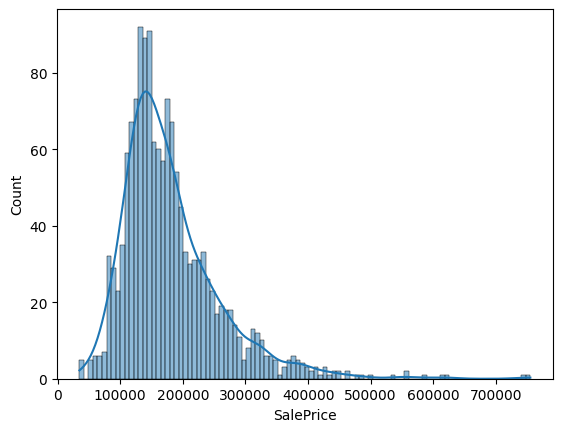

In [29]:
# Now that we have no nulls, let's look at our features. Let's start with the target
# We will plot a simple histogram to see the distrubition


sns.histplot(data=train, x='SalePrice', bins=100, kde=True)

# We can see that there are extreme outliers on the right side and a long tail

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

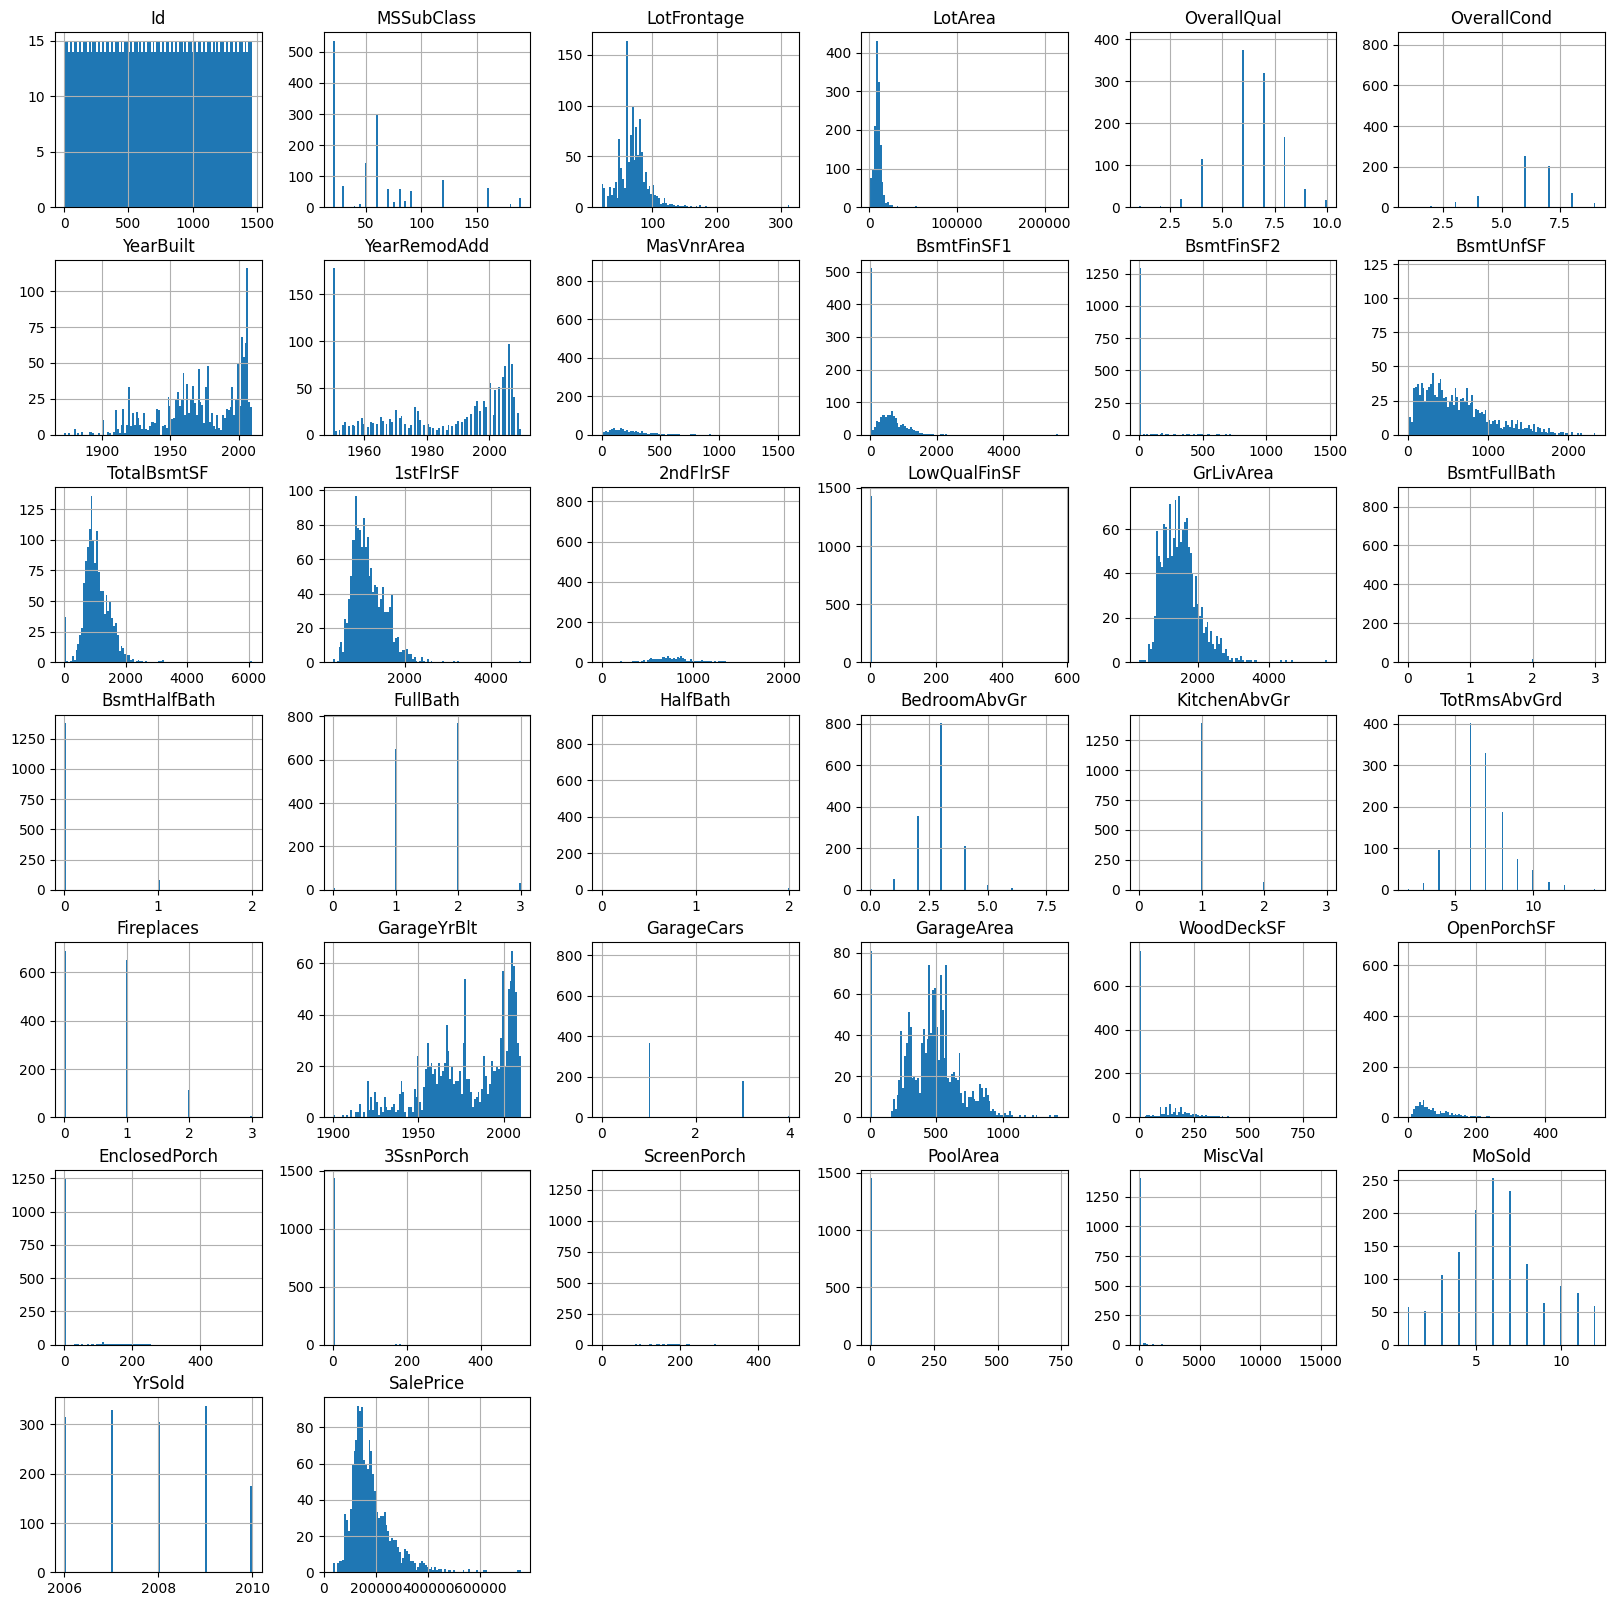

In [30]:
# Now let's histograms of all the other features to see if anything stands out
train.hist(bins=100, figsize=(20, 20))

In [31]:
# Some of these have ridiculous skews and will be terrible for our small dataset. Let's clean them up

# Let's convert PoolArea into a boolean HasPool
df["HasPool"] = df["PoolArea"] > 0
df = df.drop("PoolArea", axis=1)

# LowQualFinSF, BsmtFinSF2, MiscVal have 99% 0 so these won't be useful
df = df.drop(["LowQualFinSF", "BsmtFinSF2", "MiscVal"], axis=1)

Text(0.5, 1.0, 'Correlation of Features to Target')

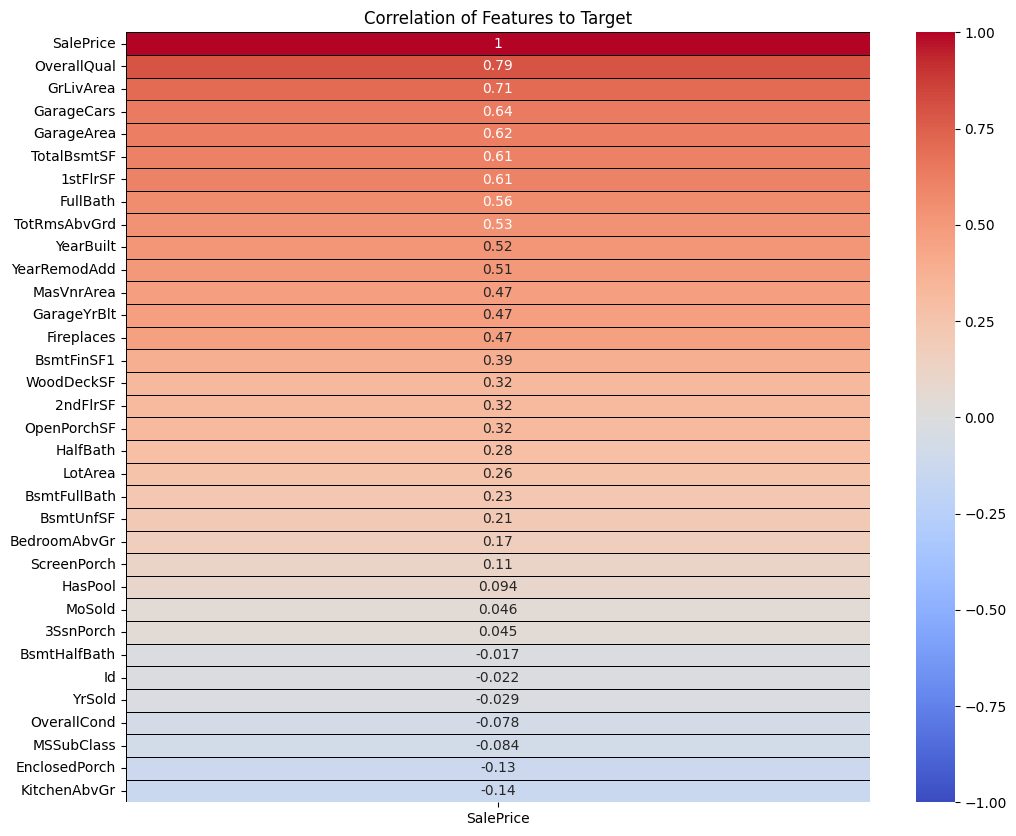

In [32]:
# Now let's see how these features all correlate to our target

# First remove the test data since it has our -1 target placeholder
df_without_test = df[df["SalePrice"] > 0]

# Create the plot
plt.figure(figsize=(12, 10))

# Build the correlation matrix
correlation_matrix = df_without_test.corr()['SalePrice'].sort_values(ascending=False).to_frame()

# Plot the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, vmin=-1, vmax=1,
            linewidths=0.5, linecolor='black')

# Set the title of the heatmap
plt.title('Correlation of Features to Target')

# Now we can start to understand the data and how it relates

# Model Training

## Step 1: Split the data

In [33]:
# Unsplit our data that we started with
train_df = df[df["SalePrice"] > 0]
test_df = df[df["SalePrice"] == -1]
# Drop the target from our test data since it was a placeholder
test_df = test_df.drop("SalePrice", axis=1)
del df

# This should have the same row counts as we started with (1460 and 1459) since we shouldn't drop rows
print("Tran data:", train_df.shape)
print("Test data:", test_df.shape)

Tran data: (1460, 34)
Test data: (1459, 33)


In [34]:
# We can't use the test_df for anything since it doesn't have the target labels
# X is our feature columns
X = train_df.drop("SalePrice", axis=1)
# y is our target column
y = train_df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Our X data should have the same features as our test_df")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

print("Our y data should have a single target")
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Let's create a dictionary for all of our results so we can compare different models
model_results = {}

Our X data should have the same features as our test_df
X_train: (1095, 33)
X_test: (365, 33)
Our y data should have a single target
y_train: (1095,)
y_test: (365,)


## Train Baseline (Decision Tree) Model

In [35]:
from sklearn.tree import DecisionTreeRegressor


# Initialize the DecisionTreeRegressor (since its real data) model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model (and save to our results)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results = {"mse": mse, "r2": r2}
model_results["decision_tree_model"] = results

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2055429864.7260275
R-squared: 0.7065896951342001


## Train Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the RandomForestRegressor (since its real data) model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results = {"mse": mse, "r2": r2}
model_results["random_forest_model"] = results

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 762668457.528833
R-squared: 0.8911299341926747


## Train Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression


# Initialize the LinearRegression model
linear_regression_model = LinearRegression()

# Train the model on the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results = {"mse": mse, "r2": r2}
model_results["linear_regression_model"] = results

# Print evaluation metrics
print(f"Mean Squared Error (Linear Regression): {mse}")
print(f"R-squared (Linear Regression): {r2}")


Mean Squared Error (Linear Regression): 1200255872.835518
R-squared (Linear Regression): 0.8286648220845145


## Train SVM (Support Vector Regression) Model

In [38]:
from sklearn.svm import SVR


# Initialize the SVR model
svm_model = SVR(kernel='linear')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results = {"mse": mse, "r2": r2}
model_results["svm_model"] = results

# Print evaluation metrics
print(f"Mean Squared Error (SVM): {mse}")
print(f"R-squared (SVM): {r2}")

Mean Squared Error (SVM): 1454986308.8778057
R-squared (SVM): 0.7923023384111891


## Train KNN Model

In [39]:
from sklearn.neighbors import KNeighborsRegressor


# Since knn has hyper-parameters, I will attempt a few simple ones
for n_neighbours in range(3, 6):
  # Initialize the KNeighborsRegressor model
  knn_model = KNeighborsRegressor(n_neighbors=n_neighbours)

  # Train the model on the training data
  knn_model.fit(X_train, y_train)

  # Make predictions on the test data
  y_pred = knn_model.predict(X_test)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results = {"mse": mse, "r2": r2}
  model_results[f"knn_model_{n_neighbours}_neighbours"] = results

  # Print evaluation metrics
  print(f"Mean Squared Error (k-NN_{n_neighbours}): {mse}")
  print(f"R-squared (k-NN_{n_neighbours}): {r2}")


Mean Squared Error (k-NN_3): 2133646826.72968
R-squared (k-NN_3): 0.6954243116487231
Mean Squared Error (k-NN_4): 1978784394.010445
R-squared (k-NN_4): 0.717530750003148
Mean Squared Error (k-NN_5): 2100634332.185096
R-squared (k-NN_5): 0.7001368081707088


## Model Refinement and Hyper Parameter Tuning

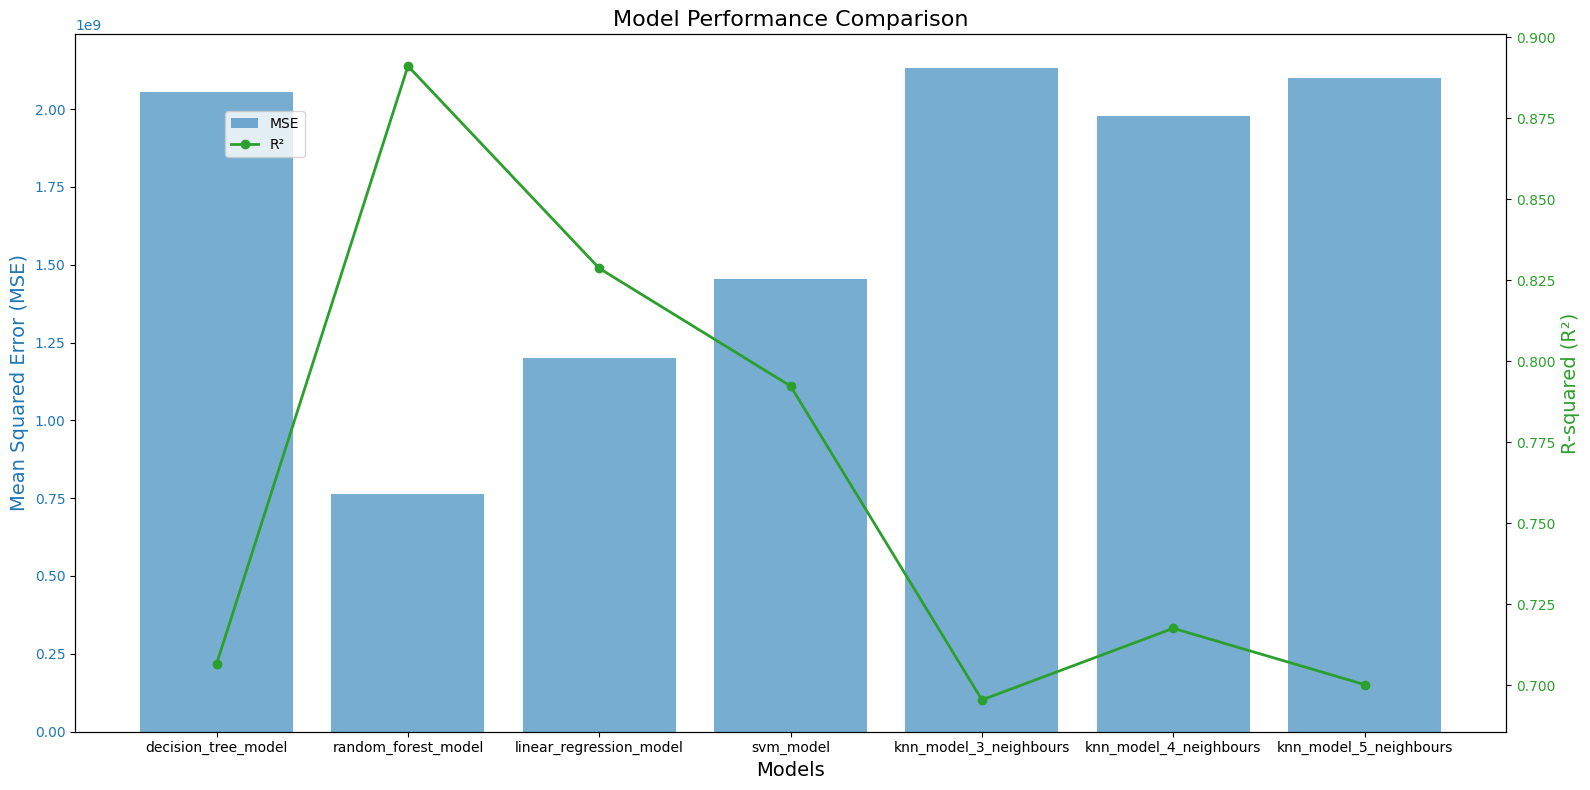

In [40]:
# First I want to compare all of the simple models to the baseline model and see which model type is effective on this data
# And then I will start tuning the better models to maximize their accuracy

# Extract model names, MSE and R² values from my dictionary of results
models = list(model_results.keys())
mse_values = []
r2_values = []
for model in models:
  results = model_results[model]
  mse_values.append(results["mse"])
  r2_values.append(results["r2"])

# Create a nice large plot for easy visualization
fig, ax1 = plt.subplots(figsize=(16, 8))

# Bar plot for each MSE
ax1.set_title('Model Performance Comparison', fontsize=16)
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Mean Squared Error (MSE)', fontsize=14, color='tab:blue')
ax1.bar(models, mse_values, color='tab:blue', alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared (R²)', fontsize=14, color='tab:green')
ax2.plot(models, r2_values, color='tab:green', marker='o', linestyle='-', linewidth=2, label='R²')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Adding legends
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)


From the graph it's clear that Random Forest is a very strong model, having both the lowest mean squared error as well as the highest r_squared score.
KNN models performed about similar to our baseline model. Linear Regression and SVM were in the middle and might do well with tuning. But we will focus on RAndom Forest for our final model for this project.

In [41]:
from sklearn.model_selection import GridSearchCV


# Let's do a Grid Search on our RAndom Forest model to try and get the best parameters

# Define the parameter grid to search over
# I tested a much larger grid search locally and
# am testing a smaller one in this notebook for reference
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [False],
}

# Initialize the GridSearchCV with the model and the parameter grid
grid_search = GridSearchCV(estimator=random_forest_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results = {"mse": mse, "r2": r2}
model_results[f"best_estimator"] = results

# Print the best parameters and evaluation metrics
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error: 750400065.6442615
R-squared: 0.8928812333563391


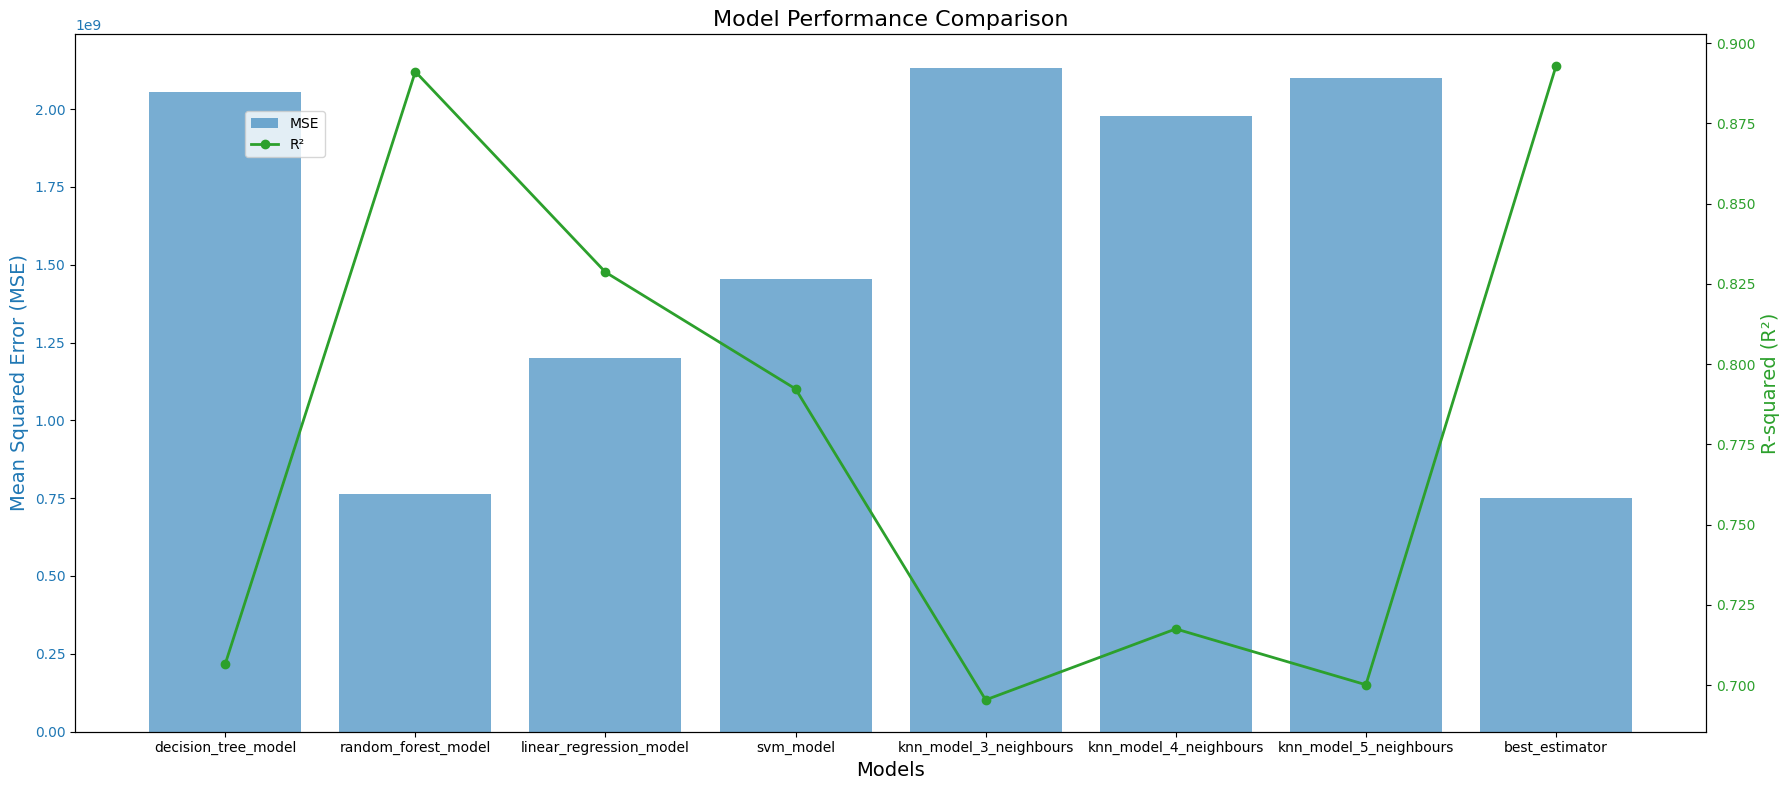

In [45]:
# Let's re-examine the results and add our best estimator from the grid search for reference

# Extract model names, MSE and R² values from my dictionary of results
models = list(model_results.keys())
mse_values = []
r2_values = []
for model in models:
  results = model_results[model]
  mse_values.append(results["mse"])
  r2_values.append(results["r2"])

# Create a nice large plot for easy visualization
fig, ax1 = plt.subplots(figsize=(18, 8))

# Bar plot for each MSE
ax1.set_title('Model Performance Comparison', fontsize=16)
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Mean Squared Error (MSE)', fontsize=14, color='tab:blue')
ax1.bar(models, mse_values, color='tab:blue', alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis to plot R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared (R²)', fontsize=14, color='tab:green')
ax2.plot(models, r2_values, color='tab:green', marker='o', linestyle='-', linewidth=2, label='R²')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Adding legends
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)


## Predict on the Test Data

In [50]:
# Since this is a kaggle competition dataset, let's use our model to predict the actual results

# Generate predictions on test data
test_predict = best_model.predict(test_df)

# Generate an output csv file to submit to Kaggle
prediction_csv = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": test_predict
    })
prediction_csv.to_csv('submission.csv', index=False)
print(prediction_csv)

# It was passable but not amazing lol. I got #3190 on the leaderboard

        Id      SalePrice
1460  1461  124195.132491
1461  1462  154905.959235
1462  1463  185383.453648
1463  1464  185809.578933
1464  1465  197248.448256
...    ...            ...
2914  2915   90867.259863
2915  2916   93879.158887
2916  2917  167338.175097
2917  2918  117590.858285
2918  2919  240501.307268

[1459 rows x 2 columns]
